#MA4550: THA-ONE<br>

Url:
https://colab.research.google.com/drive/1i5SOw8DempQ1E2Q_9_oD1aPnfyy9GKMC?authuser=1#scrollTo=fH74O7mJKJMk

Email: jasminepak00@gmail.com<br/>
Name: PAK KA YEE<br/>
SID: 55692027 <br/>

**Question 1:**
A desktop computer named MA4550DC has the following specification: **quad-core**, 24GB RAM, **2.5 GHz**, and each core has **8 floating units** (perform 8 DP operations in one clock cycle). What is the theoretical double precision peak performance of the desktop in FLOPS?<br/>

<u>Answer 1</u><br/>

Cores: 4 <br/>
Number per second: 2.5 GHz<br/>
Double-Precision Floating Point Operation per Cycle: 8<br/>
The theoretical double precision peak performance: 4\*2.5\*8=80 GFLOPS<br/><br/>


In [6]:
4*2.5*8

80.0

**Question 2:**
Given **A** is a **M x K** matrix, **B** is a **K x N** matrix, what is <u>the number of floating point operation (FLOP) of A x B<u/>?<br/>

</u>Answer 2</u><br/>
MN\*(2K-1) FLOPS<br/><br/>

**Question 3**
Given M=K=N for A and B, what is the **maximum dimension N** that MA4550DC can hold?<br/>

<u>Answer 3</u><br/>

24GB RAM<br/>
Double-Precision Floating Point Operation per Cycle: 8<br/>
For square matrices A and B, the maximum dimension N is the square root of **24G/8**, which is square root of **3G** ≈ 54772.2557505166, which is **N=54772**.

In [ ]:
## question 3
import math
math.sqrt(3e9)

54772.25575051661

**Question 4:**
Based on the answer above, what is the time needed to compute C=A x B if **90% of the theoretical rate** of MA4550DC can be attained for the BLAS3 operation?

<u>Answer 4</u><br/>
The matrix size: n=54772<br/>
BLAS3 operation: <br/>
*   For memory refernce: 4n^2 operation
*   For folating point calculation: 2n^3 operation

Total number of FLOP: 4n^2 + 2n^3 = 4*(54772^2) + 3(54772^2) = 4∗3G+2∗164,314G = 328,640 GFLOP<br/>
The 90% of the theoretical rate of MA4550DC = 328,640 GFLOP/(80*0.9) = 4,565 s ≈ 1.2679 hour.

In [ ]:
n = 54772
flop = (4*(n**2) + 2*(n**3)) 
time = flop / (80e9 *0.9)
time_in_hour = time / 3600
print(f'Flop: {flop} operations, time: {time_in_hour:.5} hour.')


Flop: 328640930903232 operations, time: 1.2679 hour.



**Question 5:**
Write a **python code** to compute C = A x B and **plot a curve** of the FLOPS against the matrix size N when the computation is done on a **CPU**. Do the same on the **GPU**.

<u>Answer 5</u><br/>

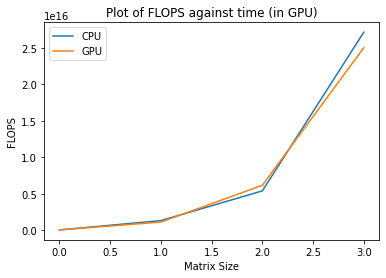

In [ ]:
 ## question 5
import tensorflow as tf
from matplotlib import pyplot as plt
import time
import numpy as np

cpu = []
gpu = []
N = [500, 1000, 2000, 4000]

# TensorFlow on CPU
with tf.device('/CPU:0'):
    for n in N:
      # create two random 
      A = tf.random.uniform(shape=[n,n])
      B = tf.random.uniform(shape=[n,n])

      start_time = time.time()
      C = A * B
      end_time = time.time()
      diff_time = end_time - start_time

      flops = (n*(n-1) * n*n) / diff_time

      cpu.append(flops)

# TensorFlow on GPU
with tf.device('/GPU:0'):
    for n in N:
      # create two random 
      A = tf.random.uniform(shape=[n,n])
      B = tf.random.uniform(shape=[n,n])

      start_time = time.time()
      C = A * B
      end_time = time.time()
      diff_time = end_time - start_time

      flops = (n*(n-1) * n*n) / diff_time

      gpu.append(flops)

plt.plot(
    np.array([cpu, gpu]).T
)
plt.legend(['CPU', 'GPU'])

plt.title('Plot of FLOPS against time (in GPU)')
plt.ylabel('FLOPS')
plt.xlabel('Matrix Size');

References:


1. https://blog.csdn.net/dcrmg/article/details/79747882
2. https://colab.research.google.com/drive/1Ldu-QVs-7I49HUwDdlGLYMjIZqc___aU?authuser=1

